### Regression Modeling with TensorFlow Made Easy

In [1]:
# Step 1: Set Up Your Environment
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# Step 2: Load and Explore the Dataset
# Load the data and set the 'id' column as the index
url = 'https://github.com/fenago/datasets/raw/refs/heads/main/Regression_housedata.csv'
df = pd.read_csv(url, sep=';', index_col='id')
df.head()

,bedrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,price
id,,,,,,,
7129300520,3,1180,5650,1,1180,0,221900.0
6414100192,3,2570,7242,2,2170,400,538000.0
5631500400,2,770,10000,1,770,0,180000.0
2487200875,4,1960,5000,1,1050,910,604000.0
1954400510,3,1680,8080,1,1680,0,510000.0


In [3]:
# Step 3: Data Cleaning
# Drop columns if necessary (commented for template purposes)
# columns_to_drop = ['some_column']
# df = df.drop(columns=columns_to_drop)

In [4]:
import pandas as pd
import numpy as np

def data_quality_report(df):
    report = []

    for col in df.columns:
        col_data = df[col]
        col_type = col_data.dtype
        unique_values = col_data.nunique()
        missing_values = col_data.isnull().sum()
        
        # Initialize problem and recommendation lists
        problems = []
        recommendations = []
        
        # Check for high cardinality in non-numeric columns
        if col_type == 'object' and unique_values > 50:
            problems.append("High cardinality (many unique values)")
            recommendations.append("Consider encoding with caution or reducing categories")
        
        # Check for missing values
        if missing_values > 0:
            problems.append(f"Missing values (count: {missing_values})")
            recommendations.append("Consider imputing missing values or removing rows")

        # For numeric columns only, check for infinities, scaling, and other issues
        if pd.api.types.is_numeric_dtype(col_data):
            # Check for infinities
            has_inf = np.isinf(col_data).sum()
            if has_inf > 0:
                problems.append(f"Infinities found (count: {has_inf})")
                recommendations.append("Consider replacing infinities with a large finite value")
            
            # Check if scaling is needed based on range
            col_range = col_data.max() - col_data.min()
            if col_range > 1000 or col_data.std() > 100:
                problems.append("Wide range of values")
                recommendations.append("Consider scaling (e.g., Min-Max or Standard Scaler)")

        # Check if column is non-numeric and may need encoding
        elif col_type == 'object':
            problems.append("Non-numeric column may require encoding")
            recommendations.append("Consider one-hot encoding or label encoding if needed")
        
        # Add column summary to report
        report.append({
            "Column": col,
            "Data Type": col_type,
            "Unique Values": unique_values,
            "Potential Problems": "; ".join(problems) if problems else "None",
            "Recommendations": "; ".join(recommendations) if recommendations else "None"
        })

    # Convert report to a DataFrame for easy viewing
    report_df = pd.DataFrame(report)
    return report_df

# Usage example
report_df = data_quality_report(df)
report_df

,Column,Data Type,Unique Values,Potential Problems,Recommendations
0,bedrooms,int64,8,None,None
1,sqft_living,int64,321,Wide range of values,"Consider scaling (e.g., Min-Max or Standard Sc..."
2,sqft_lot,int64,828,Wide range of values,"Consider scaling (e.g., Min-Max or Standard Sc..."
3,floors,int64,3,None,None
4,sqft_above,int64,291,Wide range of values,"Consider scaling (e.g., Min-Max or Standard Sc..."
5,sqft_basement,int64,140,Wide range of values,"Consider scaling (e.g., Min-Max or Standard Sc..."
6,price,float64,580,Wide range of values,"Consider scaling (e.g., Min-Max or Standard Sc..."


In [5]:
# Check for missing values
print(df.isnull().sum())

bedrooms         0
sqft_living      0
sqft_lot         0
floors           0
sqft_above       0
sqft_basement    0
price            0
dtype: int64


In [6]:
# Step 4: Feature Engineering
df['total_sqft'] = df['sqft_living'] + df['sqft_basement']

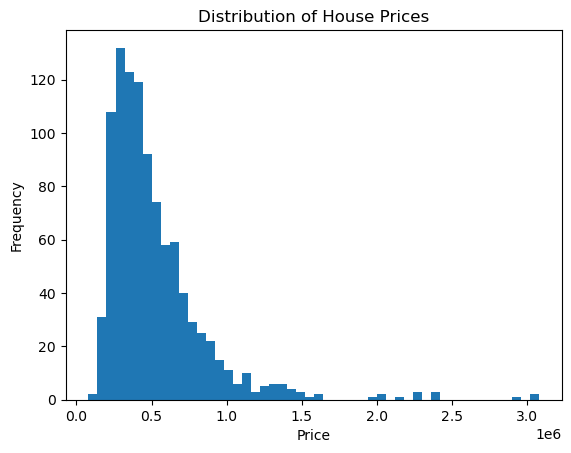

In [7]:
# Step 5: Target Variable Visualization and Outlier Removal
# Visualize the distribution of the target variable
# obviously change this for your target variable!
# experiment with the number of bins
plt.hist(df['price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()

In [8]:
# Outlier Removal Technique --- there are many... but his one is my favorite
# OPTIONAL --- you don't have to remove the outliers... but you can
from scipy import stats

# Calculate Z-scores for 'price' column
df['price_z'] = np.abs(stats.zscore(df['price']))

# Filter out rows where the Z-score is greater than 3
df = df[df['price_z'] <= 3]

# Drop the 'price_z' column after filtering
df = df.drop(columns=['price_z'])

In [9]:
# Step 6: Data Preparation for Machine Learning

# Initialize the column transformer
transformer = make_column_transformer(
    (MinMaxScaler(), ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']),
    remainder='passthrough'
)

# Separate features from the target variable
X = df.drop(columns=['price'])
y = df['price']

In [10]:
# from sklearn.compose import make_column_transformer
# from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


# transformer = make_column_transformer(
    (MinMaxScaler(), 
        ['sqft_living', 'sqft_lot','sqft_above', 
         'sqft_basement', 'house_age']),
    (OneHotEncoder(handle_unknown='ignore'), 
        ['bedrooms', 'bathrooms', 'floors', 
         'view', 'condition'])
)

IndentationError: unexpected indent (3164937738.py, line 6)

In [11]:
# Step 7: Train-Test Split

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Split data into features and target
# Remember to update this for your target... mine is called price
X = df.drop(columns=['price'])
y = df['price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the column transformer
transformer = make_column_transformer(
    (MinMaxScaler(), ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']),
    remainder='passthrough'
)

# Fit and transform the training data, and transform the test data
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [12]:
# Step 8: Build the Neural Network Model
# Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

C:\Users\sudwa\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Step 9: Train the Model

# Train the model
model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 297133244416.0000 - mae: 486886.9688 - val_loss: 307320487936.0000 - val_mae: 495146.0312
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 313213911040.0000 - mae: 496757.2500 - val_loss: 305800314880.0000 - val_mae: 493808.5938
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 265700573184.0000 - mae: 463038.5000 - val_loss: 303101313024.0000 - val_mae: 491424.0625
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 302391427072.0000 - mae: 490738.9688 - val_loss: 298525491200.0000 - val_mae: 487352.0625
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 281743196160.0000 - mae: 473669.8438 - val_loss: 291475980288.0000 - val_mae: 481004.7500
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 280991203328.0000 - mae: 473171.2812 - val_loss: 281239912448.0000 - val_mae: 471621.2812
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 280101847040.0000 - mae: 466509.5938 - va

In [14]:
# Step 10: Model Evaluation

# Evaluate the model using RMSE
predictions = model.predict(X_test)
rmse = np.sqrt(np.mean((y_test - predictions.flatten()) ** 2))
print(f"Test RMSE: {rmse}")

# Text summary of the model
model.summary()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Test RMSE: 231445.1397704416


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,037 (109.52 KB)

 Trainable params: 9,345 (36.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,692 (73.02 KB)

In [20]:
!pip install pydot

In [21]:

from tensorflow.keras.utils import plot_model

# Generate a visual diagram of the model structure
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [22]:
# Step 11: Making Predictions
# Predict on new data
new_predictions = model.predict(X_test[:5])
print("Sample predictions:", new_predictions.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
Sample predictions: [513675.75 231929.2  534972.9  272743.9  205699.61]


In [26]:
!pip install graphviz
!pip install pydot

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 38307188736.0000 - mae: 147939.6094 - val_loss: 53259517952.0000 - val_mae: 171825.2969
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 41093566464.0000 - mae: 151041.4844 - val_loss: 53206671360.0000 - val_mae: 171680.3438
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 36634345472.0000 - mae: 144733.4219 - val_loss: 53208563712.0000 - val_mae: 171690.1719
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 38202671104.0000 - mae: 147355.4688 - val_loss: 53218488320.0000 - val_mae: 171722.3281
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 41564270592.0000 - mae: 155569.1875 - val_loss: 53192663040.0000 - val_mae: 171636.8750
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 39602044928.0000 - mae: 151910.1406 - val_loss: 53180112896.0000 - val_mae: 171571.5312
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 35704737792.0000 - mae: 145256.2500 - val_loss: 531974

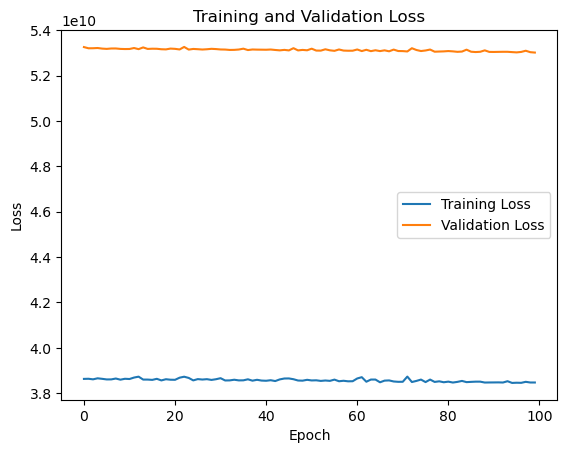

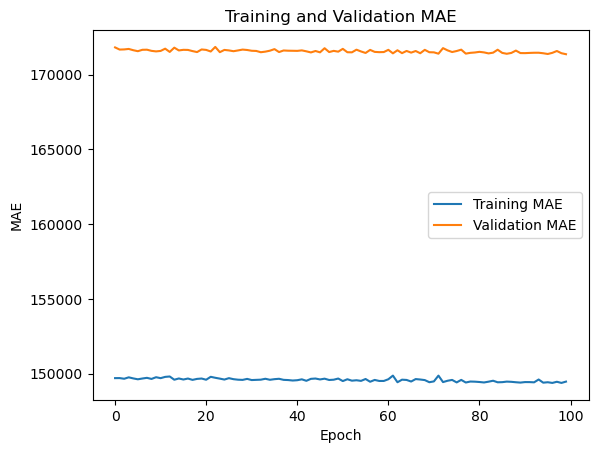

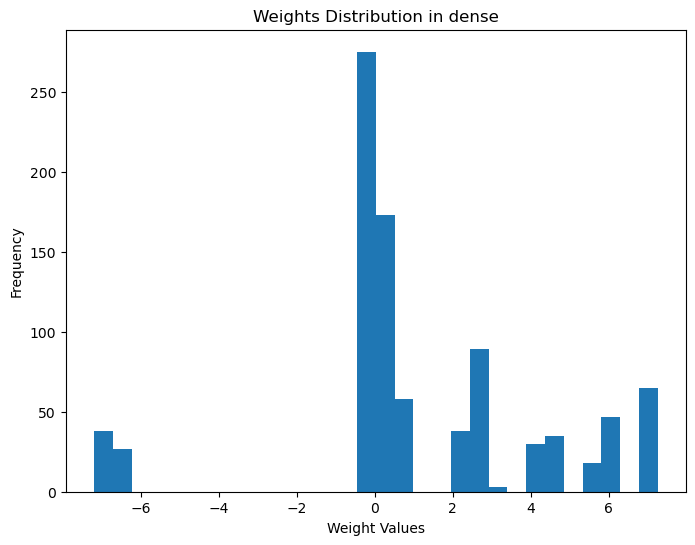

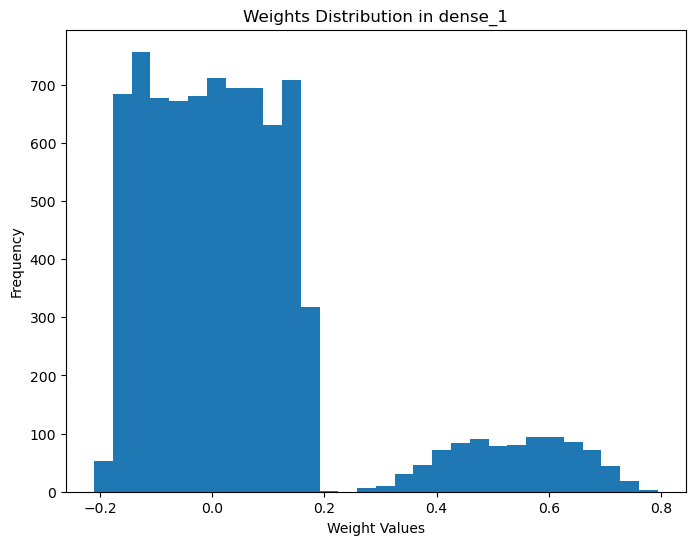

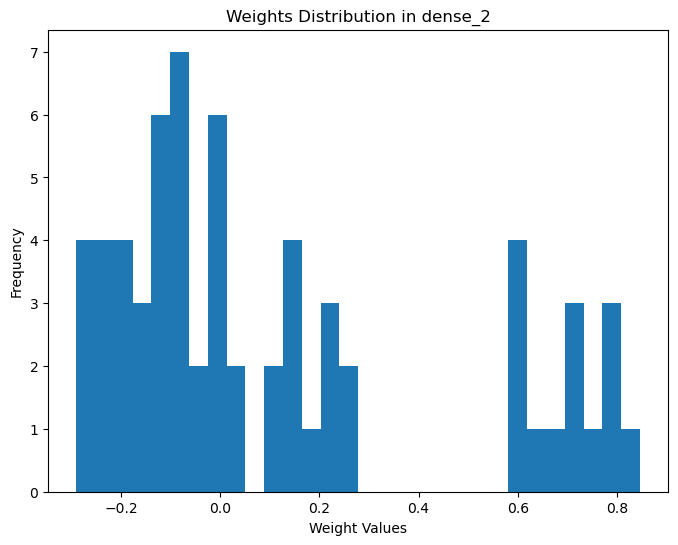

In [27]:


# Train the model and save the training history
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

# Plot training & validation loss and metrics
import matplotlib.pyplot as plt

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot Mean Absolute Error (MAE)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Training and Validation MAE')
plt.show()

# Visualize weights of each Dense layer
for layer in model.layers:
    if isinstance(layer, Dense):
        weights, biases = layer.get_weights()
        plt.figure(figsize=(8, 6))
        plt.hist(weights.flatten(), bins=30)
        plt.title(f"Weights Distribution in {layer.name}")
        plt.xlabel("Weight Values")
        plt.ylabel("Frequency")
        plt.show()